<a href="https://colab.research.google.com/github/yunhsuan1009/yunhsuan/blob/main/hw02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW02 Web Crawler

## 摘要

本報告旨在透過網路爬蟲技術，收集米其林官方網站上所有來自世界各國的一星餐廳，由於餐廳數量高達18143間，因此先隨機爬取北歐國家20間不同的一星餐廳做參考。

## 引言

隨著人們飲食習慣的改變，對「吃」的講究也日益提升。無論是在國內用餐還是出國旅遊，米其林餐廳指南早已成為眾人心中的指標，甚至有越來越多人以「摘星」來形容自己造訪米其林餐廳的經驗。近年來，米其林指南也新增了「必比登推介」項目，讓人們不再僅將米其林與高價餐廳劃上等號，許多物美價廉的小吃也因此被納入米其林的行列。

## 方法

- 目標網站描述
  - 目標網站：米其林指南網站中「一星餐廳」的資訊  
  https://guide.michelin.com/tw/zh_TW/restaurants/1-star-michelin
  - 頁面結構：包含餐廳名稱、圖片、營業時間、地點、餐廳所屬國家等資訊。

- 工具與技術
  - 使用 Python 的 `requests` 庫發送 HTTP 請求。
  - 使用 `BeautifulSoup` 解析 HTML。
  


In [1]:
# 爬取資料程式碼
import requests
from bs4 import BeautifulSoup

url = 'https://guide.michelin.com/tw/zh_TW/restaurants/1-star-michelin'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36'
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
print(soup.title.text)


一星餐廳——所有米其林指南內的一星餐廳


In [2]:
restaurants = soup.find_all('h3', class_='card__menu-content--title pl-text pl-big js-match-height-title')
restaurants[0].a.text.strip()

'Parsley Salon'

In [3]:
contry = soup.find_all('div', class_='align-items-end js-match-height-bottom')
info = contry[0].text.strip()
cleaned_info = ' '.join(info.split())
print(cleaned_info)

Hellerup, 丹麥 €€€ · 現代菜


text/html;charset=utf-8


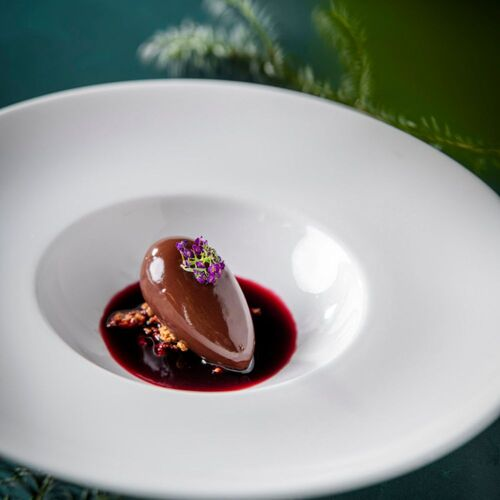

In [4]:
import time
from IPython.display import Image,display
img_src = soup.find_all('h3', class_='card__menu-content--title pl-text pl-big js-match-height-title')
lin_src = img_src[0].a.get('href')
img_web = 'https://guide.michelin.com'+lin_src

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36'}
resp = requests.get(img_web,headers=headers)
print(resp.headers.get('content-type'))
soup1 = BeautifulSoup(resp.text, 'html.parser')

img_elements = soup1.find_all('img', attrs={'ci-src': True})[0].get('ci-src')

display(Image(img_elements))


## 結果



第1間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/capital-region/hellerup_7770408/restaurant/parsley-salon
餐廳名稱： Parsley Salon
資訊： Hellerup, 丹麥 € · 法國菜
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/ed63667b4e0449f2ace583d84eaf1085.jpeg


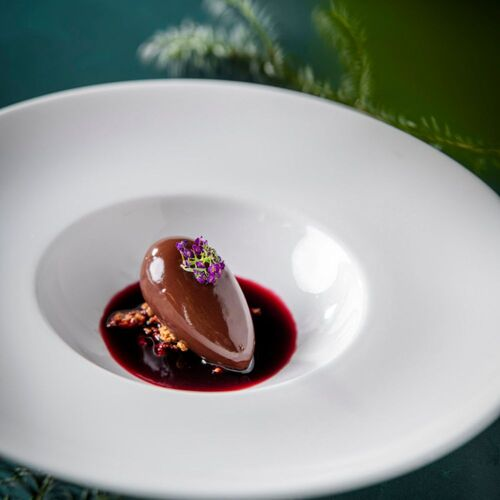


第2間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/capital-region/copenhagen/restaurant/udtryk
餐廳名稱： Udtryk
資訊： Copenhagen, 丹麥 € · 現代菜
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/e0575f2ba5ac4f3ab19f32e60d4b9b93.jpeg


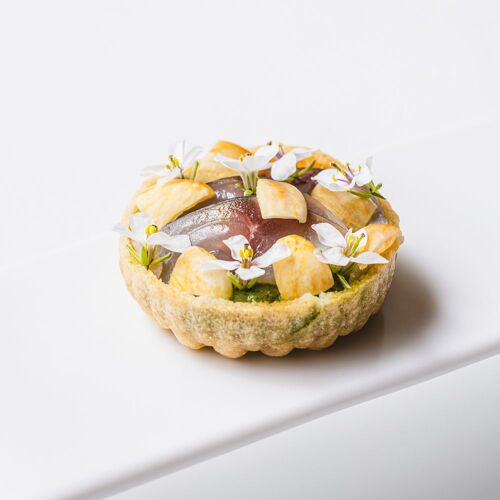


第3間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/hordaland/bergen/restaurant/gaptrast
餐廳名稱： Gaptrast
資訊： Bergen, 挪威 €€ · 日本菜
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/04ac99f8326948c4affc1a30fa969562.jpg


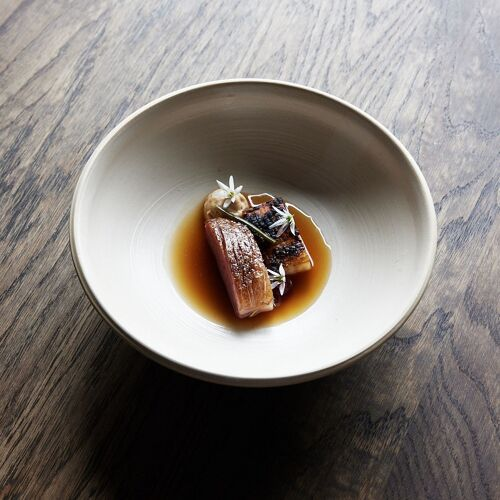


第4間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/capital-region/copenhagen/restaurant/texture-1215658
餐廳名稱： texture
資訊： Copenhagen, 丹麥 €€€ · 現代菜
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/212a96b046da4c3b9db8fc04c167b356.jpeg


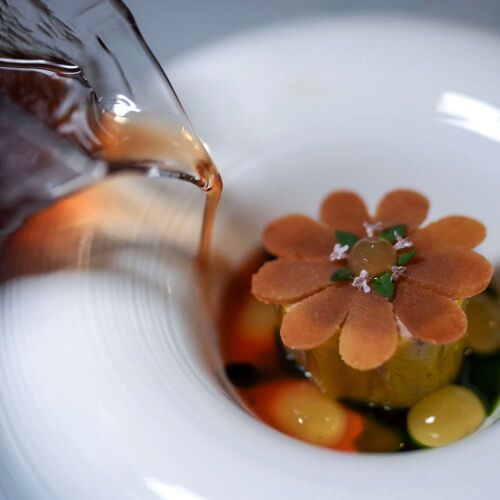


第5間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/capital-region/hellerup_7770408/restaurant/the-samuel
餐廳名稱： The Samuel
資訊： Hellerup, 丹麥 € · 法國菜
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/d02ca09f86644cc8a2a1139b1ece8941.jpg


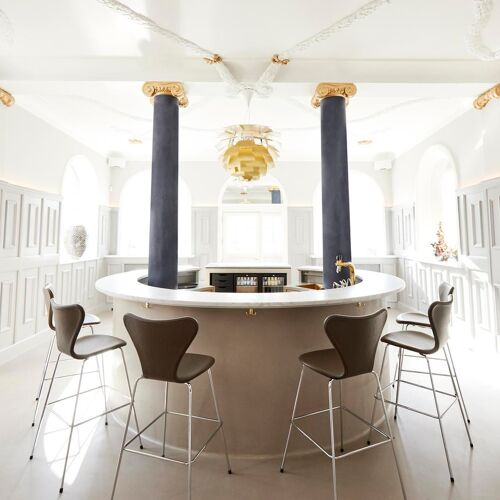


第6間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/rogaland/stavanger/restaurant/k2-1192264
餐廳名稱： K2
資訊： Stavanger, 挪威 €€ · 挪威菜
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/0a3b728280a7424f99062114d10e67cb.jpeg


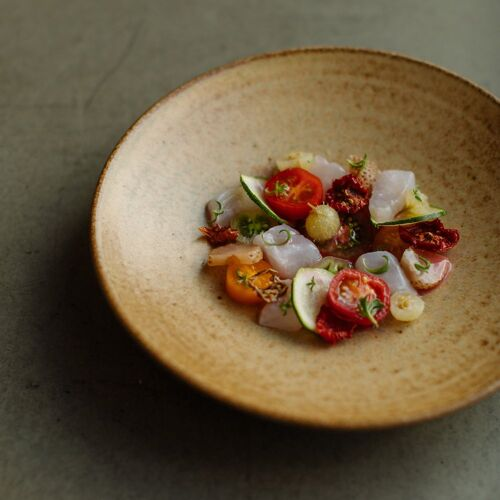


第7間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/oslo-region/oslo/restaurant/hyde
餐廳名稱： HYDE
資訊： Oslo, 挪威 €€ · 現代菜
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/6831ff5b4b414bf29cf04e6dc6fe89a9.jpeg


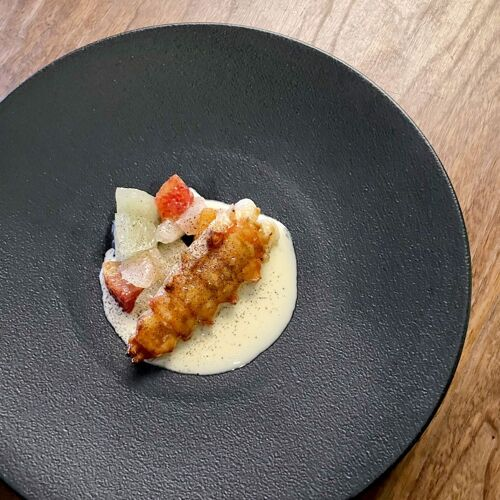


第8間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/uusimaa/helsinki/restaurant/finnjavel-salonki
餐廳名稱： Finnjävel Salonki
資訊： Helsinki, 芬蘭 €€ · 泰國菜
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/fca6b66ff73f4bd4aedd290d09033b40.jpeg


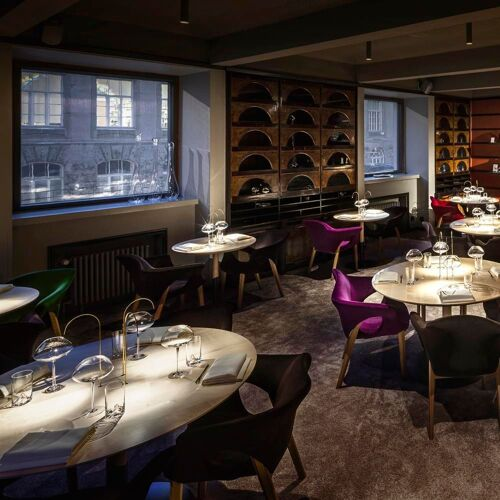


第9間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/uusimaa/helsinki/restaurant/gron
餐廳名稱： Grön
資訊： Helsinki, 芬蘭 €€€ · 法國菜
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/5e4a9afed08743a7b992377e4bd53b51.jpg


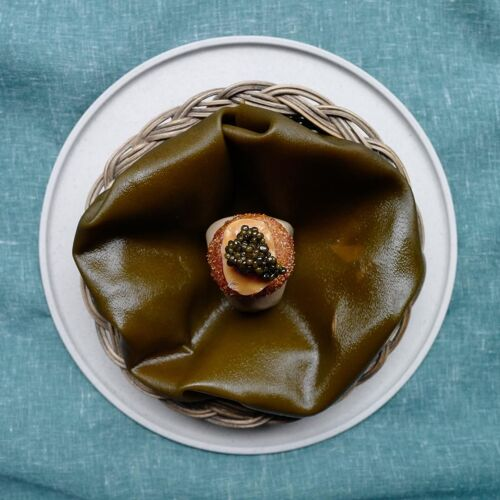


第10間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/north-denmark/lonstrup/restaurant/villa-vest
餐廳名稱： Villa Vest
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/7dc1cd889203469bb232ce409e387eb8.jpeg


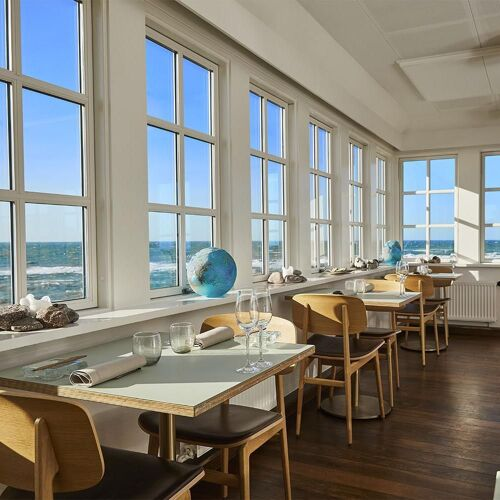


第11間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/rogaland/stavanger/restaurant/sabi-omakase
餐廳名稱： Sabi Omakase Stavanger
資訊： Stavanger, 挪威 €€€ · 現代菜
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/cb19b98b7adc46c3989d003a9a9209f2.jpeg


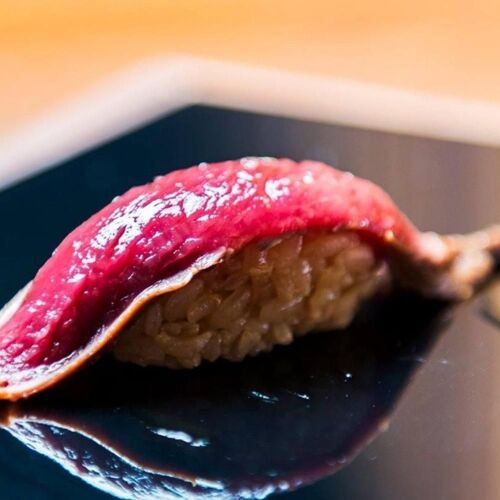


第12間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/vastra-gotaland/gothenburg/restaurant/28
餐廳名稱： 28+
資訊： Gothenburg, 瑞典 €€ · 斯堪的納維亞菜
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/2adc07e3bf4747b89e7d06137c670d84.jpg


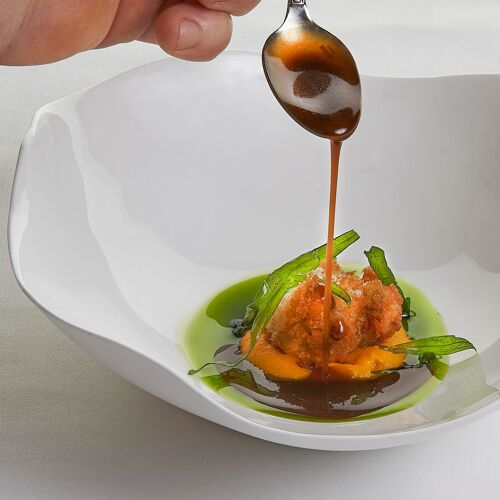


第13間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/stockholm-region/stockholm/restaurant/adam-albin
餐廳名稱： Adam / Albin
資訊： Stockholm, 瑞典 €€€ · 日本菜
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/a7d2b0def4d244aca901d1fb49a73ef6.jpeg


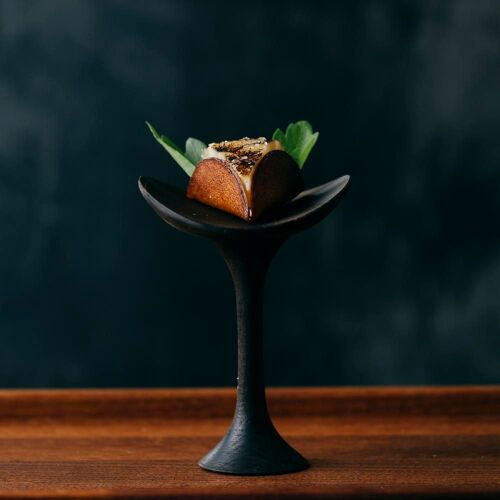


第14間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/stockholm-region/stockholm/restaurant/etoile
餐廳名稱： Etoile
資訊： Stockholm, 瑞典 €€ · 現代菜
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/8286fb2e65984387a74bea94f626e910.jpeg


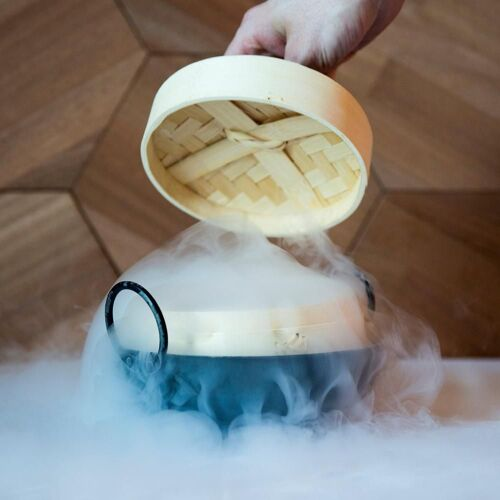


第15間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/vastra-gotaland/gothenburg/restaurant/sk-mat-manniskor
餐廳名稱： SK Mat & Människor
資訊： Gothenburg, 瑞典 €€€ · 現代菜
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/5755a2cf7c564344b33dfc43e115446a.jpg


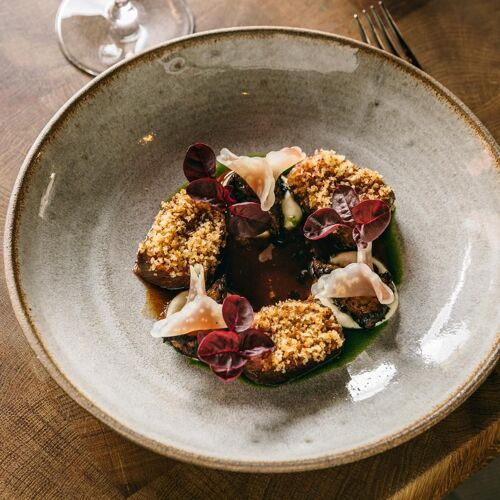


第16間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/capital-region/kirkeby/restaurant/kadeau-bornholm
餐廳名稱： Kadeau Bornholm
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/23332a77241d4840a6cd7231d588cad7.jpg


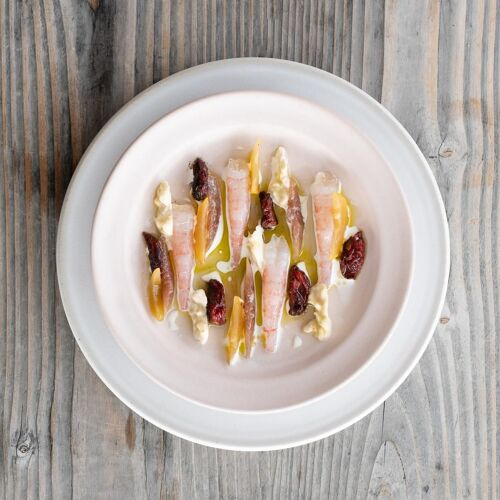


第17間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/zealand/horve/restaurant/dragsholm-slot-gourmet
餐廳名稱： Dragsholm Slot Gourmet
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/a3efe990a582489ba3c84101c4f10beb.jpg


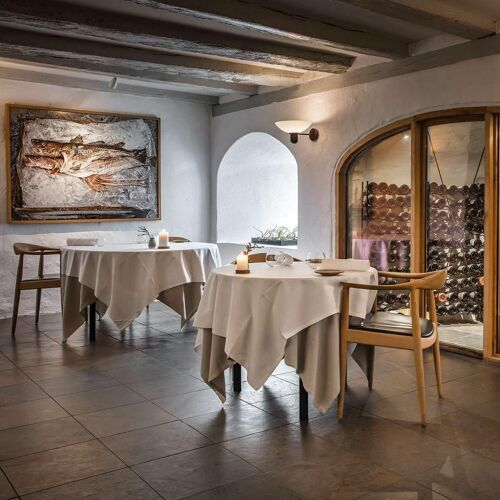


第18間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/oslo-region/oslo/restaurant/sabi-omakase-oslo
餐廳名稱： Sabi Omakase Oslo
資訊： Oslo, 挪威 €€€ · 海鮮
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/6d6ead837d81432ab858bd1a75123ba2.jpeg


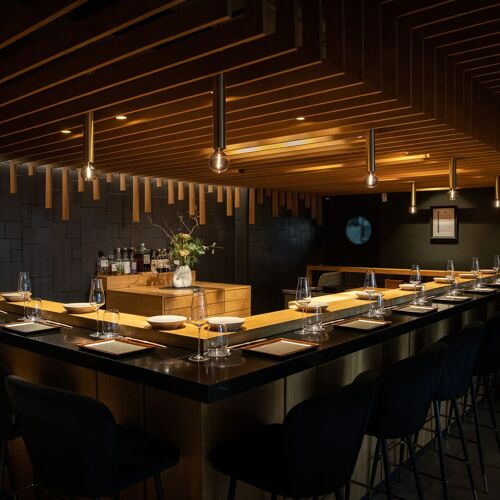


第19間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/oslo-region/oslo/restaurant/statholdergaarden
餐廳名稱： Statholdergaarden
資訊： Oslo, 挪威 €€€ · 傳統菜
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/3214d5201a1649a8a435f6cd9b77103f.jpeg


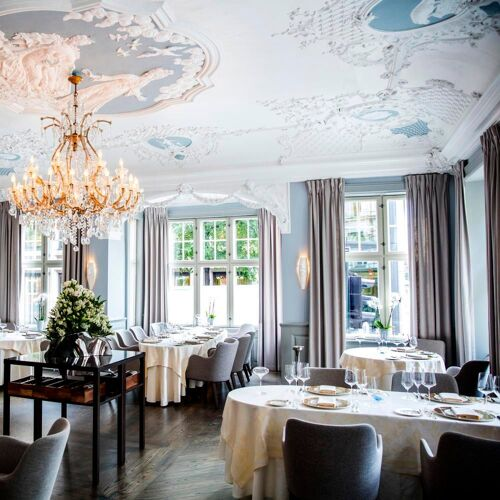


第20間餐廳：
連結： https://guide.michelin.com/tw/zh_TW/capital-region/copenhagen/restaurant/sollerod-kro
餐廳名稱： Søllerød Kro
圖片網址： https://axwwgrkdco.cloudimg.io/v7/__gmpics3__/c45575907ea94600baf7163991eeffa5.jpg


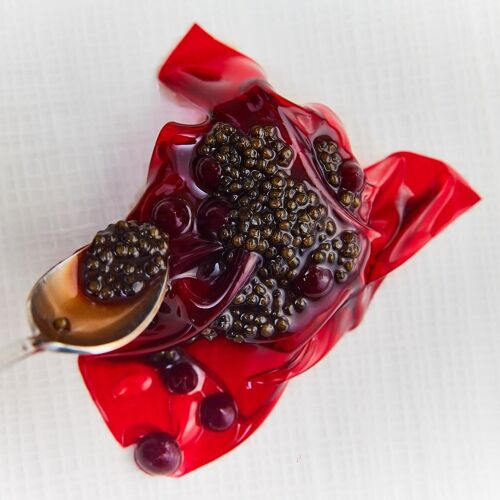

In [6]:
# 展示資料程式碼
import requests
from bs4 import BeautifulSoup
from IPython.display import Image, display
import time

url = 'https://guide.michelin.com/tw/zh_TW/restaurants/1-star-michelin'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36'}

resp = requests.get(url, headers=headers)
soup = BeautifulSoup(resp.text, 'html.parser')

cards = soup.find_all('h3', class_='card__menu-content--title pl-text pl-big js-match-height-title')

count = 0
for card in cards:
    if count >= 20:
        break

    if not card.a:
        continue

    print(f'\n第{count+1}間餐廳：')
    lin_src = card.a.get('href')
    restaurant_url = 'https://guide.michelin.com' + lin_src
    print("連結：", restaurant_url)

    resp_detail = requests.get(restaurant_url, headers=headers)
    soup_detail = BeautifulSoup(resp_detail.text, 'html.parser')

    name = card.text.strip()
    print("餐廳名稱：", name)

    contry_info = soup_detail.find_all('div', class_='align-items-end js-match-height-bottom')
    if contry_info:
        raw_info = contry_info[0].text.strip()
        cleaned_info = ' '.join(raw_info.split())
        print("資訊：", cleaned_info)

    img_tag = soup_detail.find_all('img', attrs={'ci-src': True})
    if img_tag:
        img_url = img_tag[0].get('ci-src')
        print("圖片網址：", img_url)
        display(Image(img_url))

    count += 1
    time.sleep(1)


## 問題與挑戰

- 技術挑戰  
    該網站的圖片為動態載入圖片
- 資料限制  
    部分餐廳沒有顯示所屬國家，資料分析不完整。

## 結論


- 成功獲取並分析了米其林推薦的一星餐廳資訊，提供要去北歐享用一星餐廳的旅客參考資訊。
- 未來可分析米其林二星、三星甚至是必比登，讓人們有更快速、多元的餐廳選擇。

## 參考文獻

* [MICHELIN](https://guide.michelin.com/tw/zh_TW/restaurants/1-star-michelin)